# Matplotlib Avançado 
## 1D Data Plots (Andre Nepomuceno - UFF)

In [1]:
%matplotlib inline
import numpy as np, matplotlib.pyplot as plt

**1.Plots Simples**

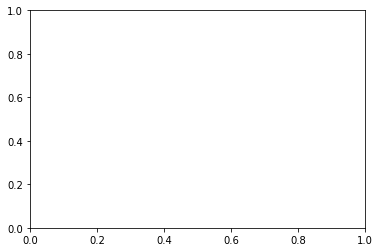

In [2]:
fig = plt.figure()
ax = fig.add_subplot()
#fig,ax = plt.subplots()

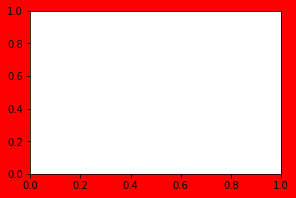

In [3]:
fig = plt.figure("Figura1", figsize=(4.5,3),facecolor='r')
ax = fig.add_subplot()
#ax.set_facecolor('b')
#ax.spines['right'].set_color('none')
#ax.spines['top'].set_color('none')

Exemplo 1- Plot as funções cosh(x) e 1 + x^2/2

Text(0, 0.5, 'y')

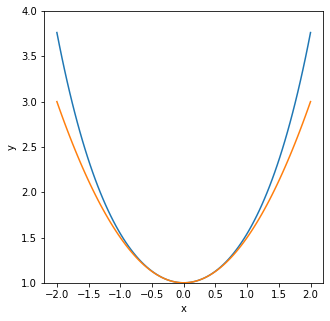

In [4]:
fig = plt.figure("Fig2", figsize=(5,5))
ax = fig.add_subplot()
x = np.linspace(-2,2,100)
ax.plot(x,np.cosh(x))
ax.plot(x,1+x**2/2)
ax.set_ylim(1,4.0)
ax.set_xlabel('x')
ax.set_ylabel('y')
#ax.set_yticks ([1, 2, 3.5, 4.])
#Veja opções de marcadores em https://matplotlib.org/stable/api/markers_api.html

**2. Marcadores**

Exemplo - decaimento exponencial em termos de tempo de vida: $y$ = $N e^{-t/\tau}$

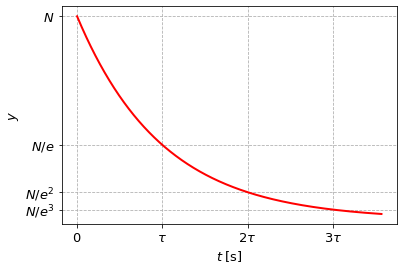

In [5]:
# Valores de N e tau
N, tau = 10000, 28
# intervalo de tempo
tmax = 100
t = np.linspace(0, tmax, 1000)
y = N * np.exp(-t/tau)

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(t, y,c='r',lw=2)

#Vamos modificar os marcadores
#Numero de vidas no intervalo tmax
ntau = tmax//tau + 1
# Lista xticks em 0, tau, 2*tau, ..., ntau*tau; e correspondente yticks
xticks = [i*tau for i in range(ntau)]  #compreensão de lista
yticks = [N * np.exp(-i) for i in range(ntau)]
ax.set_xticks(xticks)
ax.set_yticks(yticks)

# xtick labels: 0, tau, 2tau, ...
xtick_labels = [r'$0$', r'$\tau$'] + [r'${}\tau$'.format(k) for k in range(2,ntau)]
ax.set_xticklabels(xtick_labels,fontsize=13)
#ytick labels: N, N/e, N/2e, ...
ytick_labels = [r'$N$',r'$N/e$'] + [r'$N/e^{}$'.format(k) for k in range(2,ntau)]
ax.set_yticklabels(ytick_labels,fontsize=13)
#Titudo dos eixos
ax.set_xlabel(r'$t\;[\mathrm{s}]$',fontsize=13)
ax.set_ylabel(r'$y$',fontsize=13)
#ax.set_yticks([])
#ax.set_yticklabels([])
#ax.xaxis.set_ticks_position('top')
ax.grid(linestyle='--')
plt.savefig('plot_02.png')

Exemplo - opções de marcadores

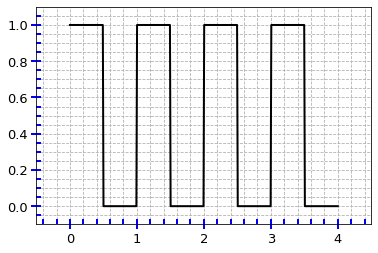

In [6]:
# Vamos plotar uma função periódica simulando um osciloscópio
def tophat(rx):
    """função: y = 1 for x < 0.5, y=0 for x >= 0.5 """
    ry = np.ones(rn)
    ry[rx>=0.5]=0
    return ry

rn = 100
rx = np.linspace(0, 1, rn)

# Repetir a função nrep vezes
nrep = 4
x = np.linspace(0, nrep, nrep*rn)
y = np.tile(tophat(rx), nrep)

#Desenhar a figura a modificar os marcadores
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(x,y, 'k', lw=2)
ax.set_ylim(-0.1,1.1)
ax.set_xlim(x[0]-0.5, x[-1]+0.5)
# Marcadores
ax.minorticks_on()
ax.tick_params(which='major', length=10, width=2, labelsize=13, direction='inout',color='b')
ax.tick_params(which='minor', length=5, width=2, labelsize=13, direction='in',color='b')
ax.grid(which='both',ls='--')
#plt.savefig('plot_03.png')
#o comando np.tile repete um array nrep times

**3. Subplots**

3.1 subplots com plt.subplots()

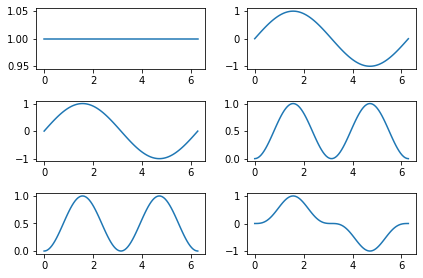

In [7]:
fig, axes = plt.subplots(nrows=3, ncols =2)
fig.tight_layout()
x = np.linspace(0,2*np.pi,100)
for i in range(3):
    for j in range(2):
        axes[i,j].plot(x,(np.sin(x)**(i+j)))

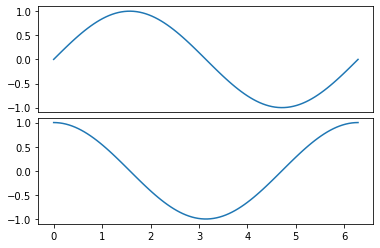

In [8]:
#Plots juntos
fig, axes = plt.subplots(2,1)
fig.subplots_adjust(hspace=0.05)
x = np.linspace(0,2*np.pi,100)
axes[0].plot(x,np.sin(x))
axes[0].set_xticks([])
axes[1].plot(x,np.cos(x))

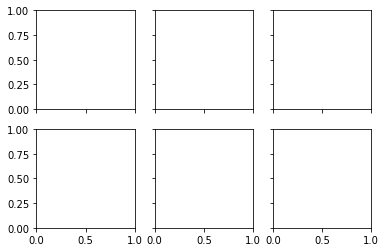

In [9]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')
plt.savefig('plot_04.png')

3.2 subplots com plt.axes()

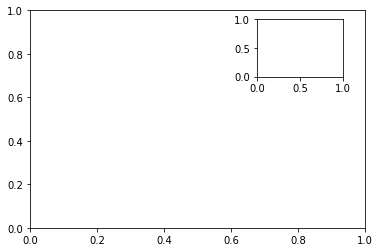

In [10]:
fig = plt.figure()
ax1 = plt.axes()
ax2 = plt.axes([0.65,0.65,0.2,0.2])

3.subplots com plt.GridSpec()

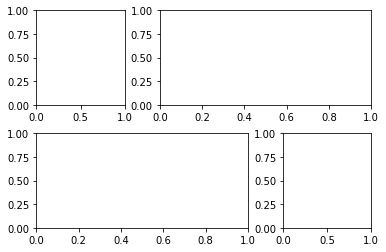

In [11]:
grid = plt.GridSpec(2, 3, hspace=0.3, wspace=0.4)
fig = plt.figure()
ax1 = fig.add_subplot(grid[0,0])
ax2 = fig.add_subplot(grid[0,1:])
ax3 = fig.add_subplot(grid[1,:2])
ax4 = fig.add_subplot(grid[1,2])

Subplots Exemplo: Difusividade térmica

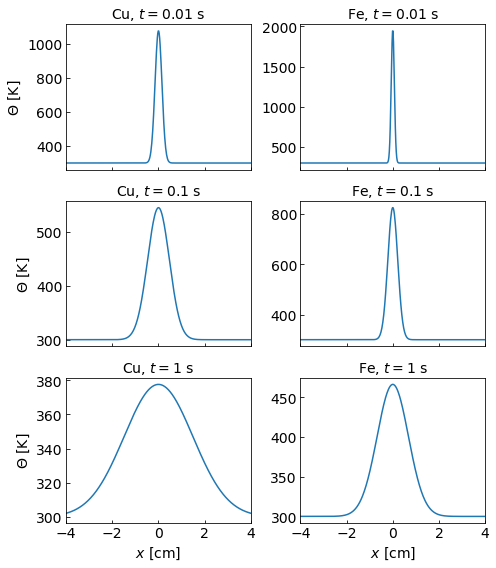

In [12]:
#difusão de calor numa barra
#Área da seção reta em m2 e H em J
A, H = 1.0e-4, 1.0e3
#temperatura em t =0, em K
theta0 = 300.
#função theta(x,t,cp,D)
def theta(x,t,cp,D):
    return H/(cp*A*np.sqrt(4*np.pi*D*t))*np.exp(-x**2/(4*D*t))

#Vamos criar um dicionário para guardar as especificações dos metais: simbolo,cp (J.m-3.K-1) e D(m2.s-1)
metais = [('Cu',3.45e6,1.11e-4),('Fe',3.54e6,2.3e-5)]
#tamanho da barra (-xlim,xlim), em metros
xlim = 0.05
x = np.linspace(-xlim,xlim,500)
times = [1e-2,0.1,1]
#Como queremos fazer um gráfico para três valores de t e dois metais, vamos fazer uma figura 3 x 2
#plt.rc('text',usetex=True)
fig , axes = plt.subplots (nrows =3, ncols =2, sharex='col',figsize =(7 , 8))
for i,t in enumerate(times):
    for j,metal in enumerate(metais):
        simb, cp, D = metal
        temp = theta0 + theta(x,t,cp,D)
        axes[i,j].plot(100*x,temp)
        axes[i,j].set_xlim(-4,4)
        axes[i,j].tick_params(direction='in',labelsize=14)
        axes[i,0].set_ylabel('$\Theta$ [K]',fontsize=14)   #label externo apenas
        axes[2,j].set_xlabel('$x$ [cm]',fontsize=14)   #label externo apenas
        axes[i,j].set_title('{}, $t = {}$ s'.format(simb,t),fontsize=14)
fig.tight_layout ()
#para melhor comparação, utilizamos o mesmo range no eixo y para um mesmo tempo.
#para isso, usamos o metodo get_ylim, que retorna uma tupla (min, max)

**4. Scatter Plots**

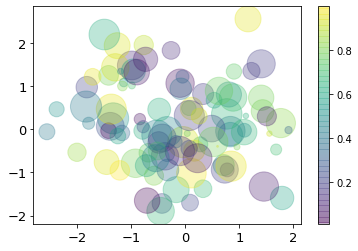

In [13]:
x = np.random.randn(100)
y = np.random.randn(100)
colors = np.random.rand(100)
sizes = 1000*np.random.rand(100)
plt.scatter(x, y, c=colors, s=sizes, alpha=0.3)
plt.colorbar()
plt.tick_params(labelsize=13)

**5. Gráficos de Barra**

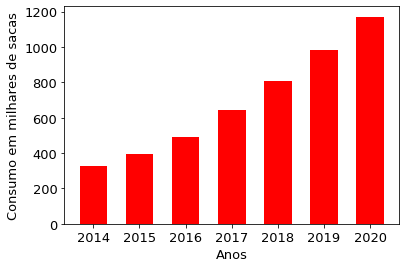

In [14]:
anos = np.arange(2014,2021)
consumo = np.array([327,392,490,643,806,981,1171])
plt.bar(anos, consumo, width=0.6,color='r',edgecolor=None)
#plt.barh(anos, consumo, height=0.6,color='r')
plt.xlabel('Anos',fontsize=13)
plt.ylabel('Consumo em milhares de sacas',fontsize=13)
plt.tick_params(labelsize=13)
#plt.savefig('plot_06.png')

**6. Gráfico de Pizza**

done


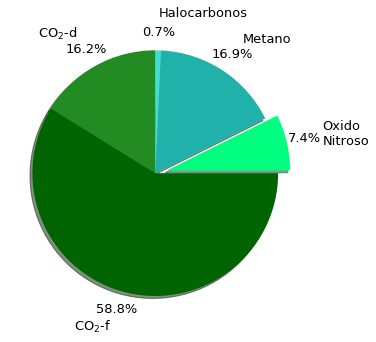

In [15]:
# Emissao anual de gases do efeito estufa.
gas_emissions = {'fonte':['$\mathrm{CO_2}$-d','$\mathrm{CO_2}$-f',
                          'Oxido\nNitroso','Metano','Halocarbonos'],
                'emissao':[2.2,8.0,1.0,2.3,0.1]}
#cores das fatias
colours = ['forestgreen', 'darkgreen', 'springgreen', 'lightseagreen', 'turquoise']

explode = [0, 0, 0.1, 0, 0]

fig, ax = plt.subplots(figsize=(5.5,5))
ax.pie(gas_emissions['emissao'],colors=colours,shadow=True, startangle=90,
       explode=explode, labels=gas_emissions['fonte'], autopct='%.1f%%',
        pctdistance=1.15, labeldistance=1.3,textprops={'fontsize': 13})
ax.axis('equal')
print('done')
#o seguimento do oxido nitroso é deslocado por 10%
# autopct='%.1f%%' significa valores com uma casa decimal.
# pctdistance, labeldistance são as distâncias radiais
#dos valores e texto, respectivamente.
#Veja lista de cores em: https://matplotlib.org/stable/gallery/color/named_colors.html

**7. Gráfico Polar**

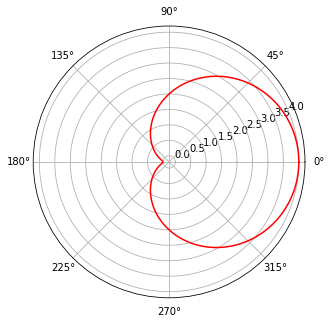

In [16]:
fig = plt.figure(figsize=(5,5))
theta = np. linspace (0, 2.* np.pi , 1000)
a = 1.
r = 2 * a * (1. + np.cos(theta ))
plt.polar(theta,r,'r')
#plt.savefig('plot_09.png')

**8. Histogramas**

(array([ 17.,  46., 106., 191., 258., 176., 117.,  60.,  24.,   5.]),
 array([-2.62565113, -2.04831288, -1.47097462, -0.89363637, -0.31629812,
         0.26104014,  0.83837839,  1.41571665,  1.9930549 ,  2.57039316,
         3.14773141]),
 <a list of 10 Patch objects>)

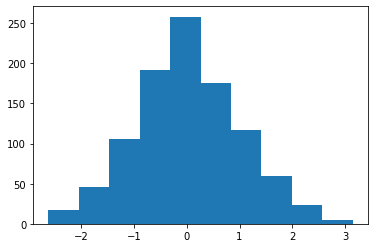

In [17]:
data = np.random.randn(1000)
plt.hist(data)

done!


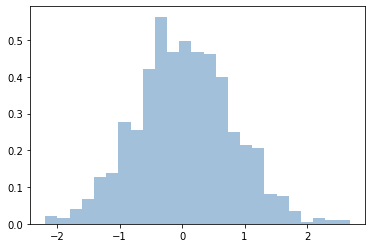

In [18]:
#opções de histograma
x1 = np.random.normal(0, 0.8, 1000)
plt.hist(x1, bins=25, density=True, alpha=0.5,
histtype='bar', color='steelblue')
print('done!')

In [19]:
contagem, x_bin = np.histogram(data,bins=10)
print(contagem)
print(x_bin)

[ 17  46 106 191 258 176 117  60  24   5]
[-2.62565113 -2.04831288 -1.47097462 -0.89363637 -0.31629812  0.26104014
  0.83837839  1.41571665  1.9930549   2.57039316  3.14773141]


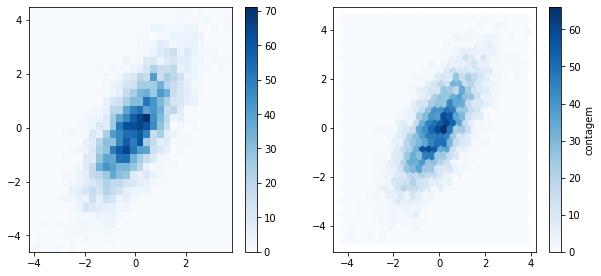

In [20]:
#histograma em 2D
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x,y = np.random.multivariate_normal(mean, cov, 5000).T
fig = plt.figure(figsize=(10,4.5))
plt.subplot(1,2,1)
plt.hist2d(x,y,bins=30,cmap='Blues')
plt.colorbar()
plt.subplot(1,2,2)
plt.hexbin(x, y, gridsize=30, cmap='Blues')
plt.colorbar(label='contagem')

**9. Anotações**

Text(0.8, 1.0, 'vertical arrow')

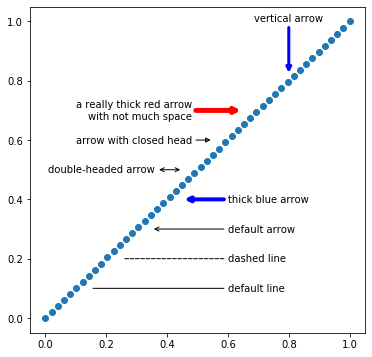

In [21]:
#diferentes estilos de seta
fig, ax = plt.subplots(figsize=(6,6))
x = np.linspace(0,1)
ax.plot(x, x, 'o')

ax.annotate('default line', xy=(0.15,0.1), xytext=(0.6,0.1),
            arrowprops={'arrowstyle': '-'}, va='center')
ax.annotate('dashed line', xy=(0.25,0.2), xytext=(0.6,0.2),
            arrowprops={'arrowstyle': '-', 'ls': 'dashed'}, va='center')
ax.annotate('default arrow', xy=(0.35,0.3), xytext=(0.6,0.3),
            arrowprops={'arrowstyle': '->'}, va='center')
ax.annotate('thick blue arrow', xy=(0.45,0.4), xytext=(0.6,0.4),
            arrowprops={'arrowstyle': '->', 'lw': 4, 'color': 'blue'},
            va='center')
ax.annotate('double-headed arrow', xy=(0.45,0.5), xytext=(0.01,0.5),
            arrowprops={'arrowstyle': '<->'}, va='center')
ax.annotate('arrow with closed head', xy=(0.55,0.6), xytext=(0.1,0.6),
            arrowprops={'arrowstyle': '-|>'}, va='center')
ax.annotate('a really thick red arrow\nwith not much space', xy=(0.65,0.7),
            xytext=(0.1,0.7), va='center', multialignment='right',
            arrowprops={'arrowstyle': '-|>', 'lw': 5, 'ec': 'r'})
ax.annotate('vertical arrow', xy=(0.8,0.82), xytext=(0.8,1.0), ha='center',
             arrowprops={'arrowstyle': '-|>', 'lw': 3, 'ec': 'b'})

**10. Linhas e Retângulos**

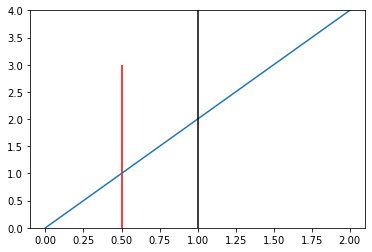

In [22]:
fig,ax = plt.subplots()
x = np.linspace(0,2,100)
ax.plot(x,2*x)
ax.set_ylim(0,4)
ax.vlines(0.5,0,3.,color='r')
ax.axvline(1.,0,1,color='k')
#ax.axvline(1.,color='k')

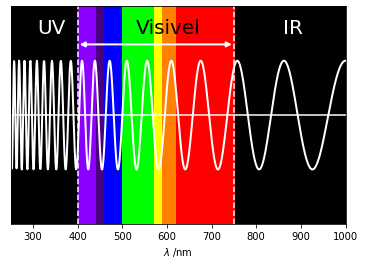

In [23]:
#Exemplo: espectro eletromagnetico
# intervalo do comprimento de onda, em nm
lmin, lmax = 250, 1000
x = np.linspace(lmin, lmax, 1000)
# Onda com comprimento de onda crescente
wv = (np.sin(10 * np.pi * x / (lmax+lmin-x)))[::-1]

fig = plt.figure()
ax = fig.add_subplot(facecolor='k') #fundo preto
                                                                    
ax.plot(x, wv, c='w', lw=2)
ax.set_xlim(250,1000)
ax.set_ylim(-2,2)

# incluir anotações
ax.text(310, 1.5, 'UV', color='w', fontdict={'fontsize': 20})
ax.text(530, 1.5, 'Visivel', color='k', fontdict={'fontsize': 20})
ax.annotate('', (400, 1.3), (750, 1.3), arrowprops={'arrowstyle': '<|-|>',
                                                    'color': 'w', 'lw': 2})
ax.text(860, 1.5, 'IR', color='w', fontdict={'fontsize': 20})
ax.axvline(400, 0, 1, c='w', ls='--')
ax.axvline(750, 0, 1, c='w', ls='--')
#linha horitonal ao longo do centro da figura
ax.axhline(c='w')
# Ditch the y-axis ticks and labels; label the x-axis
ax.yaxis.set_visible(False)
ax.set_xlabel('$\lambda\;/\mathrm{nm}$')

#Dicionario que mapeia comp. de onda para as cores RBG
rainbow_rgb = { (400, 440): '#8b00ff', (440, 460): '#4b0082',
                (460, 500): '#0000ff', (500, 570): '#00ff00',
                (570, 590): '#ffff00', (590, 620): '#ff7f00',
                (620, 750): '#ff0000'}
for wv_range, rgb in rainbow_rgb.items():
    ax.axvspan(*wv_range, color=rgb, alpha=1.0,fill=True)
#cóido de cores em https://matplotlib.org/stable/tutorials/colors/colors.html
#plt.savefig('plot_12.png')

**11. Formas geométricas**

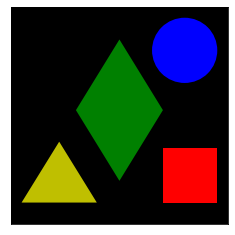

In [24]:
from matplotlib.patches import Polygon, Circle, Rectangle

#red, blue, yellow, green = '#ff0000', '#0000ff', '#ffff00', '#00ff00'
square = Rectangle((0.7, 0.1), 0.25, 0.25, facecolor='r')
circle = Circle((0.8, 0.8), 0.15, facecolor='b')
triangle = Polygon(((0.05,0.1), (0.396,0.1), (0.223, 0.38)), fc='y')
rhombus = Polygon(((0.5,0.2), (0.7,0.525), (0.5,0.85), (0.3,0.525)),  fc='g')

fig = plt.figure()
ax = fig.add_subplot(facecolor='k', aspect='equal')
for shape in (square, circle, triangle, rhombus):
    ax.add_artist(shape)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)